     Stock        1928        1929        1930        1931        1932  \
0  S&P 500  143.811155  131.877782   98.745288   55.457774   50.664911   
1  T-Bills  103.080000  106.337328  111.175676  113.743835  114.960894   
2  T-Bonds  100.835471  105.074397  109.845753  107.034958  116.443660   

         1933        1934        1935        1936  ...           2009  \
0   75.988361   75.085189  110.180323  145.375676  ...  142344.873600   
1  116.064518  116.438826  116.642594  116.840887  ...    1967.287492   
2  118.604006  128.048968  133.775379  140.488061  ...    5344.645583   

            2010           2011           2012           2013           2014  \
0  163441.938600  166871.563000  193388.430900  255553.308100  290115.415000   
1    1969.844966    1970.435920    1971.421138    1972.722276    1973.767818   
2    5796.959405    6726.521265    6926.404686    6295.785407    6972.341867   

            2015           2016           2017           2018  
0  294115.792200  328742.

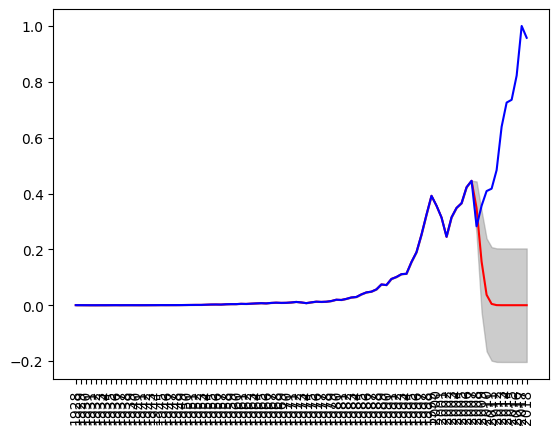

In [2]:
#IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#READ AND PREPROCESS
df=pd.read_csv('Market Returns 1928-2018.csv')

df.dropna(axis=0,inplace=True)

print(df)

#EXTRACTING COLUMNS
X=df.columns[1:]

Y=df.iloc[0,1:]
Y2 = Y.values.reshape(-1, 1)
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y2)
# print(Y1)
x_train=X[:80]
y_train=Y1[:80]
# plt.plot(x_train,y_train,color='red')
# plt.xticks(rotation='vertical')
# plt.show()

x_train1=x_train.values.reshape(-1,1)
print(x_train1.shape)
kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gp.fit(x_train1, y_train)
X=X.values.reshape(-1,1)
ypred,sigma=gp.predict(X,return_std=True)
print(ypred)

X=X.reshape(-1)
ypred=ypred.reshape(-1)
plt.plot(X,ypred,color='red')
Y1=Y1.reshape(-1)
plt.plot(X,Y1,color='blue')
plt.xticks(rotation='vertical')
plt.fill_between(X, ypred -2* sigma, ypred +2*sigma, color='gray', alpha=0.4)
plt.show()


     Stock        1928        1929        1930        1931        1932  \
0  S&P 500  143.811155  131.877782   98.745288   55.457774   50.664911   
1  T-Bills  103.080000  106.337328  111.175676  113.743835  114.960894   
2  T-Bonds  100.835471  105.074397  109.845753  107.034958  116.443660   

         1933        1934        1935        1936  ...           2009  \
0   75.988361   75.085189  110.180323  145.375676  ...  142344.873600   
1  116.064518  116.438826  116.642594  116.840887  ...    1967.287492   
2  118.604006  128.048968  133.775379  140.488061  ...    5344.645583   

            2010           2011           2012           2013           2014  \
0  163441.938600  166871.563000  193388.430900  255553.308100  290115.415000   
1    1969.844966    1970.435920    1971.421138    1972.722276    1973.767818   
2    5796.959405    6726.521265    6926.404686    6295.785407    6972.341867   

            2015           2016           2017           2018  
0  294115.792200  328742.

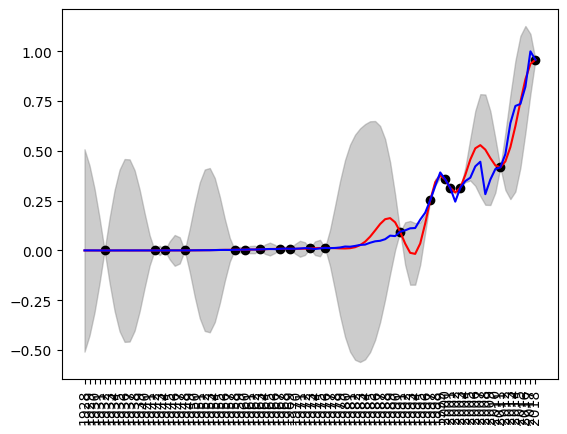

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

#READ AND PREPROCESS
df=pd.read_csv('Market Returns 1928-2018.csv')

df.dropna(axis=0,inplace=True)

print(df)

#EXTRACTING COLUMNS
X=df.columns[1:]

Y=df.iloc[0,1:]
Y2 = Y.values.reshape(-1, 1)
scaler = MinMaxScaler()
Y1 = scaler.fit_transform(Y2)
# print(Y1)
x_train,x_test,y_train,y_test=train_test_split(X,Y1,test_size=0.8)
# plt.plot(x_train,y_train,color='red')
# plt.xticks(rotation='vertical')
# plt.show()

x_train1=x_train.values.reshape(-1,1)
print(x_train1.shape)
kernel = 1.0 * RBF(length_scale=1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)


gp.fit(x_train1, y_train)
X=X.values.reshape(-1,1)
ypred,sigma=gp.predict(X,return_std=True)
print(ypred)

X=X.reshape(-1)
ypred=ypred.reshape(-1)
plt.plot(X,ypred,color='red')
Y1=Y1.reshape(-1)
plt.plot(X,Y1,color='blue')
plt.fill_between(X, ypred -2* sigma, ypred +2*sigma, color='gray', alpha=0.4)

plt.scatter(x_train,y_train,color='black')
plt.xticks(rotation='vertical')
plt.show()
